In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

df = pd.read_csv('./train.csv')

df.head(10)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
5,5,Probablemente mi película favorita de todos lo...,positivo
6,6,Seguro que me gustaría ver una resurrección de...,positivo
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo
8,8,Alentados por los comentarios positivos sobre ...,negativo
9,9,"Si te gusta la risa original desgarradora, te ...",positivo


Text(0.5, 1.0, 'Porcentaje en sentimiento')

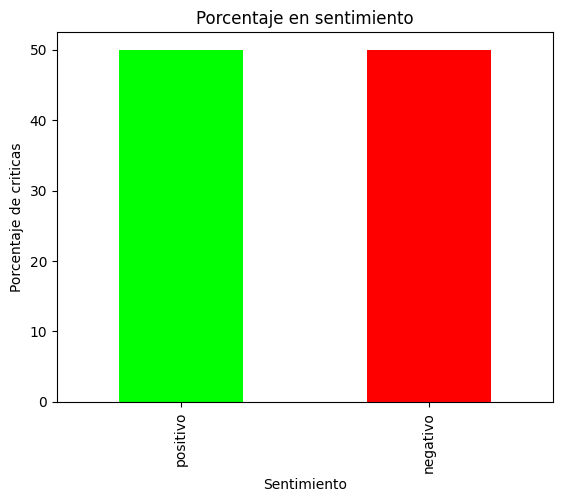

In [2]:
df_porcentaje = df['sentimiento'].value_counts(normalize=True)*100

df_porcentaje.plot(kind='bar',color=[(0,1,0),(1,0,0)])
plt.ylabel("Porcentaje de criticas")
plt.xlabel("Sentimiento")
plt.title("Porcentaje en sentimiento")

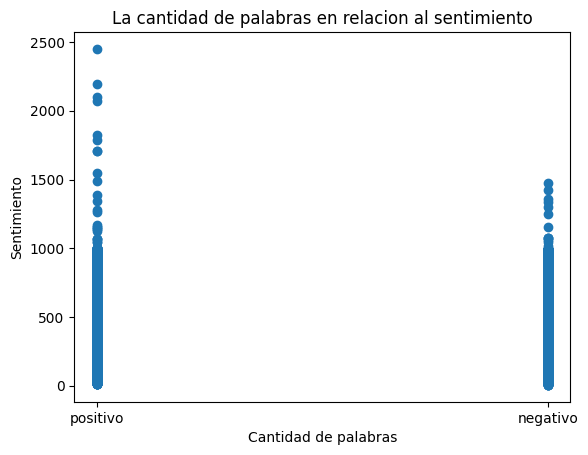

In [3]:
df['num_palabras'] = df['review_es'].str.split().apply(len)
plt.scatter(df['sentimiento'], df['num_palabras'])
plt.xlabel('Cantidad de palabras')
plt.ylabel('Sentimiento')
plt.title('La cantidad de palabras en relacion al sentimiento')
plt.show()

In [4]:
df.review_es

0        Uno de los otros críticos ha mencionado que de...
1        Una pequeña pequeña producción.La técnica de f...
2        Pensé que esta era una manera maravillosa de p...
3        Básicamente, hay una familia donde un niño peq...
4        El "amor en el tiempo" de Petter Mattei es una...
                               ...                        
49995    Pensé que esta película hizo un buen trabajo a...
49996    Mala parcela, mal diálogo, mala actuación, dir...
49997    Soy católica enseñada en escuelas primarias pa...
49998    Voy a tener que estar en desacuerdo con el com...
49999    Nadie espera que las películas de Star Trek se...
Name: review_es, Length: 50000, dtype: object

In [5]:
!pip install nltk

In [6]:
#Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(df.review_es, 
                                                    df.sentimiento,
                                                    test_size=0.30,
                                                    random_state=25,
                                                    shuffle=True)

In [7]:
import pandas as pd
import nltk
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Muestreo aleatorio
df = shuffle(df).sample(n=1000, random_state=42)  # Muestra aleatoria de 1000 filas

# Inicializar stemmer en español
stemmer = SnowballStemmer('spanish')

# Función para aplicar el stemming a una oración
def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Aplicar el stemming a la columna df.review_es y guardar en una nueva columna
df['stemmed_review'] = df['review_es'].apply(stem_sentence)

# CountVectorizer
# Eliminación de palabras poco frecuentes
vectorizer = CountVectorizer(min_df=5)

# Ajustar el vectorizador y obtener la representación Bag of Words (matriz dispersa)
X = vectorizer.fit_transform(df['stemmed_review'])

#TfidfVectorizer
vectorizer = TfidfVectorizer(smooth_idf=True)
fid = vectorizer.fit_transform(df['stemmed_review'])

# Imprimir el tamaño de la matriz de características
print("Tamaño de la matriz de características:", X.shape)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LUCAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LUCAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tamaño de la matriz de características: (1000, 3325)


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model2 = make_pipeline(CountVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(X_train, y_train)
model2.fit(X_train, y_train)
# Predict the categories of the test data
predicted_categories = model.predict(X_test)
predicted_categories_2 = model2.predict(X_test)

In [9]:
print(predicted_categories)
print(predicted_categories_2)

['positivo' 'positivo' 'positivo' ... 'negativo' 'positivo' 'positivo']
['positivo' 'positivo' 'positivo' ... 'negativo' 'positivo' 'positivo']


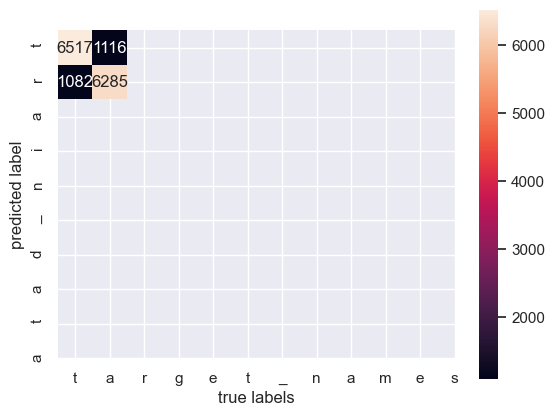

The accuracy using TfidfVectorizer  is 0.8534666666666667
The precision is TfidfVectorizer 0.8534666666666667
The accuracy count is  0.8376
The precision count is 0.8376


In [10]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
sns.set() # use seaborn plotting style

# plot the confusion matrix
mat = confusion_matrix(y_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels="target_names",yticklabels="train_data")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

print("The accuracy using TfidfVectorizer  is {}".format(accuracy_score(y_test, predicted_categories)))
print("The precision is TfidfVectorizer {}".format(precision_score(y_test, predicted_categories, average='micro',)))
print("The accuracy count is  {}".format(accuracy_score(y_test, predicted_categories_2)))
print("The precision count is {}".format(precision_score(y_test, predicted_categories_2, average='micro',)))


Como TfidfVectorizer  nos dio mejores resultados, usaremos el modelo que lo usa para hacer el predict de kaggle

AVERIGUAR BIEN Q ONDA CON TfidfVectorizer y CountVectorizer

### Predict de Kaggle

In [11]:
df_kaggle = pd.read_csv('./test.csv')
y_pred_kaggle_cv = model.predict(df_kaggle.review_es)
ds_kaggle = pd.DataFrame({'ID': df_kaggle['ID'], 'sentimiento': y_pred_kaggle_cv.ravel()})

print(ds_kaggle.shape)
ds_kaggle.to_csv('pred_kaggle_Bayes_Naive_2.csv', index=False)

(8599, 2)


### Guardamos el modelo

In [11]:
# Guardar el arbol
import joblib
filename = 'BayesNaive_v2.sav'
joblib.dump(model, filename)

['BayesNaive_v2.sav']